In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from pathlib import Path
from analysis.datasets import *
from analysis.downloads import *
from analysis.explorative_analysis import *

In [2]:
turbine_09_2016 = load_electricity_data_dynamic(2016)

## Functions

In [4]:
def check_problematic_power_ranges(dataframe):
    right_range = dataframe[(dataframe['Power (kW)'] > -20) & (dataframe['Power (kW)'] < 2050)][['Power (kW)', 'Wind speed (m/s)']]
    wrong_range = dataframe[~((dataframe['Power (kW)'] > -20) & (dataframe['Power (kW)'] < 2050))][['Power (kW)', 'Wind speed (m/s)']]
    
    return display(wrong_range)

In [786]:
def custom_power_curve(v, lambda1, lambda2, lambda3):
    v_cut = 3.8
    return np.where(
        (v <= 3.8) | (v > 22),
        0,
        (
            1
            - np.exp(
                -(
                    lambda1 * (v - v_cut)
                    + lambda2 * (v - v_cut) ** 2
                    + lambda3 * (v - v_cut) ** 3
                )
            )
        )
        * 2050,
    )

In [787]:
def fit_and_plot_power_curve(dataframe, subset_columns=['Wind speed (m/s)', 'Power (kW)'], curve_function=None, initial_guess=None, plot_title="Wind Speed vs Power Output", rated_power=2050):



    filtered_data = dataframe.dropna(subset=['Wind speed (m/s)', 'Power (kW)'])

    # Extract the columns as NumPy arrays if necessary
    wind_speeds = filtered_data[subset_columns[0]].values
    power_output = filtered_data[subset_columns[1]].values
    
    # Fit the model to the data
    initial_guess = [0.01, 0.01, 0.01]  # Initial guesses for lambda1, lambda2, lambda3
    params, covariance = curve_fit(
        custom_power_curve, wind_speeds, power_output, p0=initial_guess
    )

    # Extract fitted parameters
    lambda1_fitted, lambda2_fitted, lambda3_fitted = params

    # Generate fitted power output
    ws = np.arange(0, 35.001, 0.01)
    fitted_power = custom_power_curve(ws, lambda1_fitted, lambda2_fitted, lambda3_fitted)

    # Plotting the data and the fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(wind_speeds, power_output, color="blue", label="Observed Data", marker="o")
    plt.plot(ws, fitted_power, color="red", label="Fitted Power Curve", linewidth=2)
    plt.title("Wind Speed vs Power Output for 2016")
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power Output (kW)")
    plt.xlim(0, max(wind_speeds) + 5)  # Adjust x-limits for better view
    plt.ylim(0, 2200)  # Adjust y-limits to encompass power range
    plt.axhline(y=2050, color="grey", linestyle="--", label="Rated Power (2050 kW)")
    plt.legend()
    plt.grid()
    plt.show()

    # Print the fitted parameters
    print("Fitted parameters:")
    print(f"λ1 = {lambda1_fitted}, λ2 = {lambda2_fitted}, λ3 = {lambda3_fitted}")

## Raw Data Analysis

### 2016

In [8]:
turbine_09_2016 = load_electricity_data_dynamic(2016)
turbine_09_2016

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,5.20,0.61,3.50,7.33,8.3,5.26,0.55,3.68,7.14,5.14,...,NaN,NaN,NaN,NaN,NaN,0.97,0.28,0.10,NaN,NaN
2016-12-31 23:20:00,4.85,0.94,2.32,8.08,8.3,4.93,0.89,2.76,7.93,4.76,...,NaN,NaN,NaN,NaN,NaN,1.45,0.32,0.15,NaN,NaN
2016-12-31 23:30:00,6.48,0.96,4.71,11.34,8.3,6.51,0.94,5.05,11.03,6.45,...,NaN,NaN,NaN,NaN,NaN,1.78,0.31,0.19,NaN,NaN


In [835]:
expected_no_entries(turbine_09_2016)

Start date: 2016-06-24 11:40:00, End date: 2016-12-31 23:50:00, Total days (inclusive): 191
Expected entries based on actual date range: 27433
Actual entries: 27434
Do actual entries match expected entries? False


### 2017

In [9]:
turbine_09_2017 = load_electricity_data_dynamic(2017)
turbine_09_2017

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.39,1.35,3.36,9.87,8.7,6.46,1.29,3.56,9.72,6.33,...,NaN,NaN,NaN,NaN,NaN,2.80,0.29,0.32,NaN,NaN
2017-01-01 00:10:00,5.00,0.82,2.80,7.89,8.7,5.08,0.78,3.39,7.71,4.93,...,NaN,NaN,NaN,NaN,NaN,2.25,0.38,0.29,NaN,NaN
2017-01-01 00:20:00,6.28,1.32,3.66,9.76,8.7,6.33,1.28,3.77,9.61,6.23,...,NaN,NaN,NaN,NaN,NaN,2.23,0.31,0.34,NaN,NaN
2017-01-01 00:30:00,6.66,1.56,3.66,9.93,8.7,6.69,1.48,3.99,10.01,6.63,...,NaN,NaN,NaN,NaN,NaN,2.16,0.34,0.31,NaN,NaN
2017-01-01 00:40:00,5.48,0.91,2.89,8.31,8.7,5.59,0.89,3.40,8.79,5.37,...,NaN,NaN,NaN,NaN,NaN,1.99,0.40,0.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:10:00,9.83,1.31,6.12,14.63,8.3,9.81,1.25,6.29,14.05,9.85,...,NaN,NaN,NaN,NaN,NaN,2.88,0.34,0.38,NaN,NaN
2017-12-31 23:20:00,10.37,1.46,7.13,15.43,8.3,10.35,1.36,7.12,15.33,10.40,...,NaN,NaN,NaN,NaN,NaN,3.06,0.43,0.48,NaN,NaN
2017-12-31 23:30:00,11.21,1.66,6.98,15.78,8.3,11.12,1.54,6.93,15.29,11.30,...,NaN,NaN,NaN,NaN,NaN,3.19,0.36,0.43,NaN,NaN


In [791]:
expected_no_entries(turbine_09_2017)

Start date: 2017-01-01 00:00:00, End date: 2017-12-31 23:50:00, Total days (inclusive): 365
Expected entries based on actual date range: 52560
Actual entries: 52560
Do actual entries match expected entries? True


In [10]:
has_duplicates(turbine_09_2017)

NameError: name 'has_duplicates' is not defined

In [793]:
check_nan_in_columns(turbine_09_2017)

'Power (kW)' column contains 306 NaN values.
'Wind speed (m/s)' column contains 306 NaN values.
Both tables have the same time indices. Displaying one table.


,Power (kW),Wind speed (m/s)
time,,
2017-02-21 08:50:00,NaN,NaN
2017-02-21 09:00:00,NaN,NaN
2017-02-21 09:10:00,NaN,NaN
2017-02-21 09:20:00,NaN,NaN
2017-02-21 09:30:00,NaN,NaN
...,...,...
2017-08-21 14:00:00,NaN,NaN
2017-08-21 14:10:00,NaN,NaN
2017-08-21 14:20:00,NaN,NaN


In [794]:
check_problematic_power_ranges(turbine_09_2017)

,Power (kW),Wind speed (m/s)
time,,
2017-01-01 05:50:00,2051.149902,12.590000
2017-01-01 09:40:00,2058.969971,13.650000
2017-01-01 14:10:00,2056.979980,14.020000
2017-01-01 16:00:00,2055.149902,14.680000
2017-01-01 16:30:00,2059.649902,23.070000
...,...,...
2017-12-31 04:40:00,2050.439941,15.290000
2017-12-31 10:30:00,2050.739990,20.139999
2017-12-31 11:00:00,2053.370117,20.389999


### 2018

In [11]:
turbine_09_2018 = load_electricity_data_dynamic(2018)
turbine_09_2018

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,7.460000,1.420000,4.330000,11.450000,8.7,7.420000,1.370000,4.480000,11.520000,7.500000,...,NaN,NaN,NaN,NaN,NaN,3.10,0.36,0.47,NaN,NaN
2018-01-01 00:10:00,9.190000,1.850000,4.790000,17.709999,8.7,9.150000,1.740000,5.340000,17.030001,9.230000,...,NaN,NaN,NaN,NaN,NaN,3.26,0.31,0.48,NaN,NaN
2018-01-01 00:20:00,11.250000,1.700000,7.200000,15.740000,8.7,11.120000,1.540000,7.270000,14.900000,11.390000,...,NaN,NaN,NaN,NaN,NaN,3.33,0.42,0.51,NaN,NaN
2018-01-01 00:30:00,10.000000,1.670000,6.330000,15.430000,8.7,9.950000,1.570000,6.540000,14.770000,10.050000,...,NaN,NaN,NaN,NaN,NaN,3.43,0.49,0.45,NaN,NaN
2018-01-01 00:40:00,9.120000,1.820000,5.300000,15.050000,8.7,9.110000,1.750000,5.430000,14.490000,9.140000,...,NaN,NaN,NaN,NaN,NaN,3.54,0.24,0.49,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,11.284520,2.162764,7.948700,15.803901,8.3,11.140615,1.559136,8.080976,14.969305,11.067036,...,52.948120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:20:00,9.209886,2.021424,5.491251,12.737600,8.3,9.521799,1.803993,6.479464,12.480263,9.406956,...,27.620852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31 23:30:00,9.126036,1.821281,6.166250,13.335200,8.3,9.417792,1.716675,6.433489,12.789909,9.293406,...,37.375336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [796]:
expected_no_entries(turbine_09_2018)

Start date: 2018-01-01 00:00:00, End date: 2018-12-31 23:50:00, Total days (inclusive): 365
Expected entries based on actual date range: 52560
Actual entries: 52560
Do actual entries match expected entries? True


In [797]:
has_duplicates(turbine_09_2018)

index column has no duplicates.
Total duplicates: 0


In [798]:
check_nan_in_columns(turbine_09_2018)

'Power (kW)' column contains 270 NaN values.
'Wind speed (m/s)' column contains 270 NaN values.
Both tables have the same time indices. Displaying one table.


,Power (kW),Wind speed (m/s)
time,,
2018-01-23 13:40:00,NaN,NaN
2018-01-23 13:50:00,NaN,NaN
2018-01-23 14:00:00,NaN,NaN
2018-01-23 14:10:00,NaN,NaN
2018-06-20 09:00:00,NaN,NaN
...,...,...
2018-09-26 13:30:00,NaN,NaN
2018-09-26 13:40:00,NaN,NaN
2018-09-26 13:50:00,NaN,NaN


In [799]:
check_problematic_power_ranges(turbine_09_2018)

,Power (kW),Wind speed (m/s)
time,,
2018-01-03 02:50:00,2050.310059,17.660000
2018-01-06 04:50:00,2050.100098,14.540000
2018-01-06 07:30:00,2050.550049,14.850000
2018-01-06 07:50:00,2050.010010,16.000000
2018-01-06 08:00:00,2050.169922,15.360000
...,...,...
2018-12-18 06:20:00,2051.231445,18.291950
2018-12-18 06:40:00,2056.472900,19.795221
2018-12-29 08:30:00,2050.159668,19.079826


### 2019

In [800]:
turbine_09_2019 = load_electricity_data_dynamic(2019)
turbine_09_2019

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,11.597000,2.097376,8.12915,16.165701,8.7,11.542505,1.426407,8.997431,14.419433,11.649725,...,43.360111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:10:00,10.409136,2.099936,6.10280,15.947901,8.7,10.672056,1.669487,6.060818,14.195342,10.388451,...,43.193634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:20:00,8.661816,1.735148,5.44715,12.261050,8.7,8.894216,1.609671,6.227363,12.246125,8.642045,...,33.649994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:30:00,7.688975,1.461378,5.17220,11.816001,8.7,7.610966,1.239870,5.681144,11.214581,7.600250,...,34.014530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:40:00,9.433055,1.542603,6.14825,13.422050,8.7,9.267079,1.321978,6.327533,11.955357,9.335735,...,33.633080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:10:00,4.260080,0.715542,2.86550,6.279200,8.3,4.490940,0.656644,3.236859,6.307743,4.181225,...,28.279361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:20:00,3.707255,0.676326,1.97630,5.099301,8.3,3.798829,0.477556,3.040475,5.038103,3.733940,...,23.175012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 23:30:00,3.983690,0.804174,2.32865,5.476850,8.3,4.140302,0.696914,2.751229,5.617814,3.994940,...,19.557561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [801]:
expected_no_entries(turbine_09_2019)

Start date: 2019-01-01 00:00:00, End date: 2019-12-31 23:50:00, Total days (inclusive): 365
Expected entries based on actual date range: 52560
Actual entries: 52560
Do actual entries match expected entries? True


In [802]:
has_duplicates(turbine_09_2019)

index column has no duplicates.
Total duplicates: 0


In [803]:
check_nan_in_columns(turbine_09_2019)

'Power (kW)' column contains 282 NaN values.
'Wind speed (m/s)' column contains 282 NaN values.
Both tables have the same time indices. Displaying one table.


,Power (kW),Wind speed (m/s)
time,,
2019-01-18 06:40:00,NaN,NaN
2019-01-18 06:50:00,NaN,NaN
2019-01-18 07:00:00,NaN,NaN
2019-01-18 07:10:00,NaN,NaN
2019-01-18 07:20:00,NaN,NaN
...,...,...
2019-09-11 08:50:00,NaN,NaN
2019-09-11 09:00:00,NaN,NaN
2019-11-13 13:20:00,NaN,NaN


In [7]:
check_problematic_power_ranges(turbine_09_2019)

,Power (kW),Wind speed (m/s)
time,,
2019-01-01 13:50:00,2053.561035,16.014277
2019-01-07 15:50:00,2065.363525,20.981777
2019-01-07 17:40:00,2057.656006,20.270809
2019-01-07 18:20:00,2056.184326,17.117706
2019-01-07 18:30:00,2051.629395,16.546295
...,...,...
2019-12-29 13:50:00,2054.274692,16.657830
2019-12-29 14:50:00,2054.586991,18.530181
2019-12-29 15:10:00,2050.749060,18.275721


### 2020

In [805]:
turbine_09_2020 = load_electricity_data_dynamic(2020)
turbine_09_2020

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.228750,0.367033,0.420375,2.120625,8.7,0.765093,0.640648,0.000000,2.131303,1.246900,...,4.656375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00,1.475200,0.287528,1.113000,2.181375,8.7,0.676078,0.801691,0.000000,2.076379,1.470825,...,4.227305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00,1.085063,0.561109,0.242625,2.137126,8.7,0.685581,0.751905,0.000000,1.901457,1.092250,...,4.579148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:30:00,0.720312,0.203800,0.268875,0.999375,8.7,0.000000,0.000000,0.000000,0.000000,0.729776,...,4.656937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:40:00,1.066337,0.210553,0.450000,1.396125,8.7,0.000000,0.000000,0.000000,0.000000,1.058800,...,4.805823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,12.290688,1.148944,9.837351,14.513301,8.3,12.344713,0.816723,10.417783,13.677743,12.803960,...,31.128916,14.305690,82.129166,12.177079,61.498749,8.545143,8.545143,0.0,16.555081,12.790466
2020-12-31 23:20:00,12.462380,1.019719,9.678050,14.042601,8.3,12.058724,0.930912,10.353235,14.108872,12.516125,...,32.003461,9.007739,126.146187,8.558663,71.960464,8.597157,8.597157,0.0,32.758584,16.470679
2020-12-31 23:30:00,12.453005,1.013076,10.009701,14.602401,8.3,12.246684,0.818981,10.010707,13.776392,12.690815,...,34.505298,4.549026,106.272453,14.236636,66.036636,8.920519,8.920519,0.0,23.545154,13.652558


In [806]:
expected_no_entries(turbine_09_2020)

Start date: 2020-01-01 00:00:00, End date: 2020-12-31 23:50:00, Total days (inclusive): 366
Expected entries based on actual date range: 52704
Actual entries: 52704
Do actual entries match expected entries? True


In [807]:
has_duplicates(turbine_09_2020)

index column has no duplicates.
Total duplicates: 0


In [808]:
check_nan_in_columns(turbine_09_2019)

'Power (kW)' column contains 282 NaN values.
'Wind speed (m/s)' column contains 282 NaN values.
Both tables have the same time indices. Displaying one table.


,Power (kW),Wind speed (m/s)
time,,
2019-01-18 06:40:00,NaN,NaN
2019-01-18 06:50:00,NaN,NaN
2019-01-18 07:00:00,NaN,NaN
2019-01-18 07:10:00,NaN,NaN
2019-01-18 07:20:00,NaN,NaN
...,...,...
2019-09-11 08:50:00,NaN,NaN
2019-09-11 09:00:00,NaN,NaN
2019-11-13 13:20:00,NaN,NaN


In [809]:
check_problematic_power_ranges(turbine_09_2020)

,Power (kW),Wind speed (m/s)
time,,
2020-01-02 06:50:00,2057.746895,18.892581
2020-01-02 07:00:00,2050.576949,20.772306
2020-01-02 07:30:00,2051.483944,20.614056
2020-01-02 08:00:00,2061.387085,21.896563
2020-01-02 08:50:00,2050.199552,19.075446
...,...,...
2020-12-26 15:30:00,2061.109591,18.516306
2020-12-26 16:10:00,2057.700700,18.228351
2020-12-26 17:20:00,2053.968424,18.212211


### 2021

In [810]:
turbine_09_2021 = load_electricity_data_dynamic(2021)
turbine_09_2021

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,12.827015,1.316535,10.331000,15.727400,8.7,12.288163,1.014530,10.489029,14.646567,12.757010,...,38.679481,9.523050,98.798195,13.750509,106.852882,9.115163,9.115163,0.0,22.164237,21.640987
2021-01-01 00:10:00,12.406040,1.556363,9.273050,15.227000,8.7,12.069269,1.205840,8.992559,14.003222,12.314841,...,35.615586,13.610727,115.850624,8.206139,86.815804,8.754549,8.754549,0.0,25.278539,19.990046
2021-01-01 00:20:00,13.819028,1.450290,10.189701,16.667450,8.7,13.126737,0.980919,11.662457,15.037811,13.817352,...,39.122526,14.366296,88.476814,11.254782,75.503647,9.158375,9.158375,0.0,18.340731,17.794662
2021-01-01 00:30:00,14.104581,1.326603,11.292200,16.907751,8.7,13.480366,1.200681,9.779005,15.785589,13.880826,...,34.175426,12.223094,95.252762,11.109958,78.240189,9.498873,9.498873,0.0,25.081809,16.452448
2021-01-01 00:40:00,13.039970,1.199452,10.330550,15.226550,8.7,12.489428,0.817215,10.335576,14.091213,12.860166,...,46.768894,11.882917,93.162895,11.451258,87.022942,9.344294,9.344294,0.0,21.939925,23.220891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 23:10:00,3.775262,0.571526,2.277750,4.741550,5.8,3.988929,0.538926,2.558456,4.757686,3.730149,...,18.321783,3.695752,106.328026,1.124809,56.939537,3.887615,3.887615,0.0,31.061741,13.783983
2021-06-30 23:20:00,3.718820,0.454020,2.420000,4.466600,5.8,3.964877,0.345255,2.823693,4.630113,3.734210,...,18.122964,11.065047,123.420303,3.430307,43.389881,4.443215,4.443215,0.0,22.095522,11.336094
2021-06-30 23:30:00,3.577790,0.484314,2.739050,4.829750,5.8,3.916436,0.403062,2.834045,5.025620,3.698465,...,15.268690,10.098426,115.089439,3.873731,26.433445,4.830151,4.830151,0.0,27.781221,6.232788


In [811]:
expected_no_entries(turbine_09_2021)

Start date: 2021-01-01 00:00:00, End date: 2021-06-30 23:50:00, Total days (inclusive): 181
Expected entries based on actual date range: 26064
Actual entries: 26064
Do actual entries match expected entries? True


In [812]:
has_duplicates(turbine_09_2021)

index column has no duplicates.
Total duplicates: 0


In [813]:
check_nan_in_columns(turbine_09_2021)

'Power (kW)' column contains 27 NaN values.
'Wind speed (m/s)' column contains 27 NaN values.
Both tables have the same time indices. Displaying one table.


,Power (kW),Wind speed (m/s)
time,,
2021-02-15 10:00:00,NaN,NaN
2021-02-21 00:00:00,NaN,NaN
2021-02-21 00:10:00,NaN,NaN
2021-02-21 00:20:00,NaN,NaN
2021-02-21 00:30:00,NaN,NaN
2021-02-21 00:40:00,NaN,NaN
2021-02-21 00:50:00,NaN,NaN
2021-02-21 01:00:00,NaN,NaN
2021-02-21 01:10:00,NaN,NaN


In [814]:
check_problematic_power_ranges(turbine_09_2021)

,Power (kW),Wind speed (m/s)
time,,
2021-01-21 14:30:00,2055.874215,15.955011
2021-01-29 10:40:00,2052.428296,14.620056
2021-02-12 20:50:00,2050.079667,12.879920
2021-02-13 07:50:00,2052.935939,14.096360
2021-02-13 08:10:00,2055.286967,15.848331
...,...,...
2021-05-21 23:00:00,2050.640580,16.326156
2021-05-22 00:00:00,2053.807373,16.308063
2021-06-03 15:20:00,NaN,NaN


## Analysis of Merged Datasets

### Loading of Events data

In [815]:
#pd.set_option('display.max_colwidth', None)
data_2016_events = load_turbine_events_both(2016)
data_2016_events.head(10)

,Events,Status
intervals,,
2016-06-24 11:40:00,Informational - Overfrequency - Warnings (27) ...,Stop
2016-06-24 11:50:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:00:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:10:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:20:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:30:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:40:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:50:00,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 13:00:00,Stop - Manual brake - Manual stop (service) (...,Stop


### Loading of Electricity Data

In [816]:
data_2016_electricity = load_turbine_electricity_data_both(2016)
data_2016_electricity.head(10)

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN
2016-06-24 12:30:00,4.36,0.23,3.72,4.92,5.8,4.44,0.21,3.89,5.02,4.27,...,NaN,NaN,NaN,NaN,NaN,1.02,0.29,0.06,NaN,NaN
2016-06-24 12:40:00,4.98,0.23,4.40,5.50,5.8,4.77,0.22,4.22,5.30,5.18,...,NaN,NaN,NaN,NaN,NaN,0.57,0.26,0.05,NaN,NaN
2016-06-24 12:50:00,5.42,0.54,4.34,6.63,5.8,5.26,0.59,4.16,6.66,5.57,...,NaN,NaN,NaN,NaN,NaN,0.56,0.28,0.04,NaN,NaN
2016-06-24 13:00:00,5.47,0.43,4.24,6.36,5.8,5.42,0.54,4.03,6.46,5.53,...,NaN,NaN,NaN,NaN,NaN,0.57,0.29,0.04,NaN,NaN


### Loading of the merged Electricity & Status data

In [817]:
data_2016 = load_turbine_data_both(2016)
data_2016.head(10)

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,"Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Events,Status
time,,,,,,,,,,,,,,,,,,,,,
2016-06-24 11:40:00,0.00,0.00,0.00,0.00,5.8,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,Informational - Overfrequency - Warnings (27) ...,Stop
2016-06-24 11:50:00,5.45,0.64,2.74,6.91,5.8,5.55,0.67,2.67,6.99,5.36,...,NaN,NaN,NaN,0.58,0.28,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:00:00,4.51,1.08,1.84,6.28,5.8,4.61,1.12,1.84,6.43,4.42,...,NaN,NaN,NaN,0.56,0.29,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:10:00,3.59,0.64,1.99,5.01,5.8,3.59,0.65,1.98,5.06,3.58,...,NaN,NaN,NaN,0.58,0.30,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:20:00,4.48,0.40,2.92,5.11,5.8,4.53,0.38,3.03,5.19,4.43,...,NaN,NaN,NaN,0.68,0.25,0.06,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:30:00,4.36,0.23,3.72,4.92,5.8,4.44,0.21,3.89,5.02,4.27,...,NaN,NaN,NaN,1.02,0.29,0.06,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:40:00,4.98,0.23,4.40,5.50,5.8,4.77,0.22,4.22,5.30,5.18,...,NaN,NaN,NaN,0.57,0.26,0.05,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 12:50:00,5.42,0.54,4.34,6.63,5.8,5.26,0.59,4.16,6.66,5.57,...,NaN,NaN,NaN,0.56,0.28,0.04,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop
2016-06-24 13:00:00,5.47,0.43,4.24,6.36,5.8,5.42,0.54,4.03,6.46,5.53,...,NaN,NaN,NaN,0.57,0.29,0.04,NaN,NaN,Stop - Manual brake - Manual stop (service) (...,Stop


### Analysis

Data enrichment
- aim is to ammend the data file with information about the operation status of the turbine
- Step 1 creates a virtual status file with 10 minute intervals and 2 columns, "Status" and "Events"
- The values of the Status column is given by the values of the Status column 4. of the status file: Stop is mapped to Stop and Informational, Warning is mapped to running
- That is whenever the turbine was in stopped mode the Status of the corresponding interval is set to Stop
- These time intervals will have to be neglected in the time intervals.
- The "Events" column is a concatenation of 4 variables from the status file: "Status", "Message", "Service contract category" and "IEC category" separated by a dash

Analysis of all entries with status "Running": 
- The 2016 dataset starts in the middle of 2016. In total there are 18,346 entries, roughly half a year * 24 * 6 entries per hour. 
- The turbine was installed in the middle of June and data started to be collected from June 24th onwards
- However the turbine was not active until end of August.
- This explains the majority 7781 of the 9074 "Stop" entries where the turbine is not in productive operation.
- There are 18346 entries with Status "Running". This is to investigate which of these should be kept. There exists 34 different values of the variable "Events" (combinations of the original columns: "Status", "Message", "Service contract category" and "IEC category")
- One value of "Events" has the most entries 11,578 ("Informational - System OK - System OK (32) - Full Performance"). Such data entries will be kept in any case.
- The second biggest event with 5,615 entries is "Warning - P output externally reduced - Warnings (27) - Partial Performance"
- **All other events are small in number and will be neglected because of messages that indicate non full operation e.g. "External Stop (low wind speed)",
"Error brake resistor CHP", "SNTP error", "Parametrized P red."**

Analysis of 1st "Events": Status "Running", event: "Informational - System OK - System OK (32) - Full Performance"
- 2221 entries with negative power (kW)
- Those (negative power entries) all have wind speeds less than 4.2 (m/s)
- For wind speeds below 3 power is negative
- For wind speeds between 3-4 power can be positive or negative
- From wind speeds of 5 m/s onwards power is only positive
- The data follows the theoretical power vs wind speed curve pretty well. There are deviations for example
    - 2016-11-05 01.00 Wind Speed of 19.4 m/s 1742 kW, 10 minutes later wind speed 21.1 m/s 1741 kW
    - At this wind speed one would expect a power of 2000 kW. Could be due to the change in wind direction of 347° to 355° but the nacelle position was not adjusted, remained at 347

Analysis of 2nd "Events": "Warning - P output externally reduced - Warnings (27) - Partial performance"
- 5615 entries
- Difference to "Full Performance" is "Lost production" != 0 or "Production-based IEC B.2.3 != 1"
- This seems to indicate that the power transferred to the grid is reduced but the power produced by the turbine is not affected


In [818]:
status_running = data_2016[data_2016['Status'] == 'Running']
# Frequency of "Events" Combinations for Status = Running
running_event_counts = status_running['Events'].value_counts()
pd.DataFrame(running_event_counts)

,count
Events,
Informational - System OK - System OK (32) - Full Performance,11578
Warning - P output externally reduced - Warnings (27) - Partial Performance,5615
Informational - Parameterized P red. - Operating states (28) - | Warning - P output externally reduced - Warnings (27) - Partial Performance,293
Warning - Time sync. failed (SNTP error) - Warnings (27) - Full Performance,284
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,266
Warning - P output externally reduced - Warnings (27) - Partial Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,194
Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification | Informational - System OK - System OK (32) - Full Performance,25
Informational - System OK - System OK (32) - Full Performance | Informational - Wind < start wind - External stop (low wind speed) (5) - Out of Environmental Specification,25
Warning - P output externally reduced - Warnings (27) - Partial Performance | Warning - Error brake resistor CHP - Warnings (27) - Full Performance,12


### Plotting Wind Speed vs Power

Penmanshiel benutzt eine Senvion MM82 Turbine. Der Hersteller gibt eine theoretische Leistungskurve (Power curve = Power output in kW vs wind speed in m/s) an.
Ich habe die theoretische Leistungskurve von der Seite mit URL windpower.net heruntergeladen. Für wind speed von 4 bis 22 m/s ist in Schritten von einhalb ist die Power angegeben. Diese Daten habe ich heruntergeladen und eine Tabelle erzeugt mit wind speed und power. Daran habe ich eine exponentialkurve gefitted um eine analytische Funktion zu haben, die diesen Zusammenhang beschreibt.

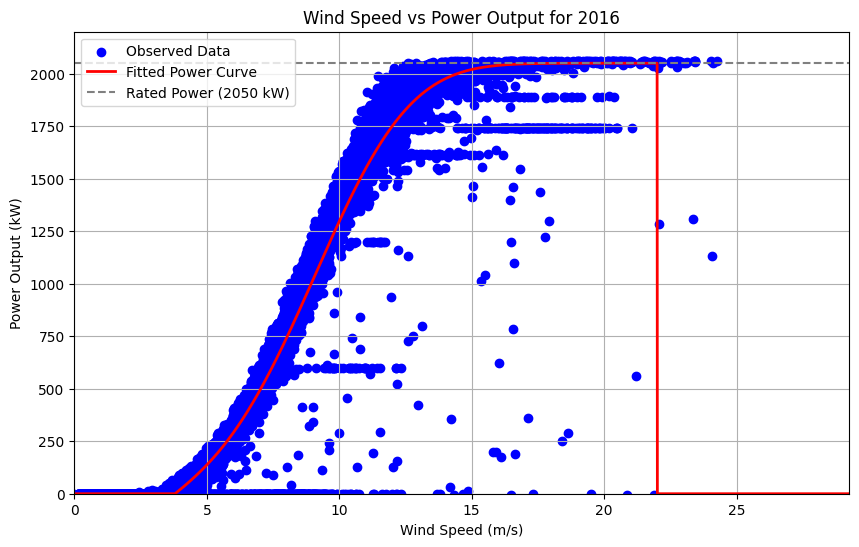

Fitted parameters:
λ1 = 0.04953486233890486, λ2 = 0.004101476615749089, λ3 = 0.00225144367141367


In [819]:
fit_and_plot_power_curve(data_2016)

In [820]:
turbine_log_powers = data_2016.copy()
turbine_log_powers['Log Power'] = np.log2(turbine_log_powers["Power (kW)"] + 16)

### Relationship between Wind Speed and Log Power of entire merged dataset 

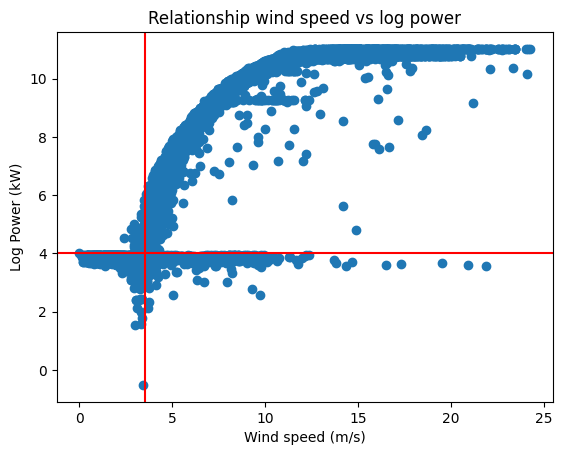

In [821]:
plt.scatter(turbine_log_powers['Wind speed (m/s)'], turbine_log_powers['Log Power'])
plt.title("Relationship wind speed vs log power")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")

### Relationship between Wind Speed and Log Power of entire merged dataset for Status = Running

Text(10, 4.5, 'Power = 0')

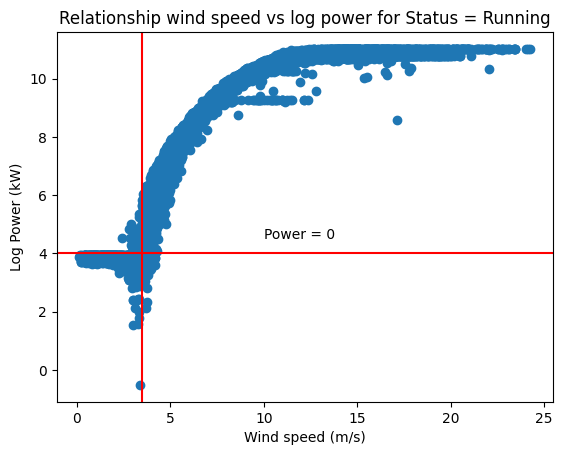

In [822]:
merged_status_running = turbine_log_powers[turbine_log_powers["Status"] == "Running"]
plt.scatter(merged_status_running['Wind speed (m/s)'], np.log2(merged_status_running["Power (kW)"] + 16)) # log2(x + 16) = 4 for x=0 since 2^4 = 16
plt.axhline(y=4, c="red")
plt.axvline(x=3.5, c="red")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("Log Power (kW)")
plt.title("Relationship wind speed vs log power for Status = Running")
plt.annotate("Power = 0", [10, 4.5])

In [5]:
static = pd.read_csv('C:/Users/Manuel/Documents/Masterarbeit/data/zenodo_turbine_data/raw/Penmanshiel_WT_static.csv')
static

,Wind Farm,Title,Alternative Title,Identity,Manufacturer,Model,Rated power (kW),Hub Height (m),Rotor Diameter (m),Latitude,Longitude,Elevation (m),Country,Commercial Operations Date,Unnamed: 14
0,Penmanshiel,Penmanshiel 01,T01,MM82/59 82765-01,Senvion,MM82,2050.0,59.0,82.0,55.902502,-2.306389,212.26,UK,01/09/2016,NaN
1,Penmanshiel,Penmanshiel 02,T02,MM82/59 82766-02,Senvion,MM82,2050.0,59.0,82.0,55.900008,-2.301268,200.46,UK,01/09/2016,NaN
2,Penmanshiel,Penmanshiel 04,T04,MM82/59 82768-04,Senvion,MM82,2050.0,59.0,82.0,55.905943,-2.302690,208.91,UK,01/09/2016,NaN
3,Penmanshiel,Penmanshiel 05,T05,MM82/59 82769-05,Senvion,MM82,2050.0,59.0,82.0,55.903294,-2.298367,201.38,UK,01/09/2016,NaN
4,Penmanshiel,Penmanshiel 06,T06,MM82/59 82770-06,Senvion,MM82,2050.0,59.0,82.0,55.900951,-2.293967,199.03,UK,01/09/2016,NaN
5,Penmanshiel,Penmanshiel 07,T07,MM82/59 82771-07,Senvion,MM82,2050.0,59.0,82.0,55.898741,-2.289856,180.24,UK,01/09/2016,NaN
6,Penmanshiel,Penmanshiel 08,T08,MM82/59 82772-08,Senvion,MM82,2050.0,59.0,82.0,55.907915,-2.297314,200.13,UK,01/09/2016,NaN
7,Penmanshiel,Penmanshiel 09,T09,MM82/59 82773-09,Senvion,MM82,2050.0,59.0,82.0,55.904990,-2.291806,187.04,UK,01/09/2016,NaN
8,Penmanshiel,Penmanshiel 10,T10,MM82/59 82774-10,Senvion,MM82,2050.0,59.0,82.0,55.903032,-2.287585,186.88,UK,01/09/2016,NaN
9,Penmanshiel,Penmanshiel 11,T11,MM82/59 82775-11,Senvion,MM82,2050.0,59.0,82.0,55.900852,-2.282371,204.84,UK,01/09/2016,NaN
